### inspiration from the diy image site: https://www.diy-malennachzahlen.de/
- reduce the resolution of a picutre
- draw the contour of the picture
- found the programming task here: https://codegolf.stackexchange.com/questions/42217/paint-by-numbers

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from skimage import io, color

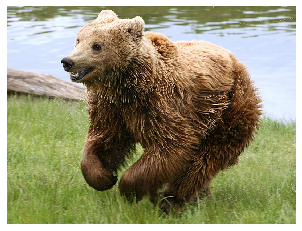

In [2]:
# image = cv2.imread("800px-Great_Wave_off_Kanagawa2.jpg")
origin_image= plt.imread("Brown_bear_(Ursus_arctos_arctos)_running.jpg")
image = origin_image.copy()
plt.axis("off")
plt.imshow(origin_image)
plt.show()

In [3]:
pixel1 = image[1][2]
pixel2 = image[2][3]

In [4]:
pixel1

array([167, 176, 175], dtype=uint8)

In [5]:
image.shape

(600, 796, 3)

In [6]:
def euclide_distance(pixel1, pixel2):
    return np.sqrt((pixel1[0] - pixel2[0])**2 +(pixel1[1] - pixel2[1])**2 + (pixel1[2] - [pixel2[2]])**2)

In [ ]:
euclide_distance(pixel1, pixel2)

In [ ]:
target_color = np.array([(i, j, k) 
                         for i in range(10) 
                         for j in range(10) for k in range(10)])
replacement_color = np.array([0, 0 ,0])

In [ ]:
flood_fill(image, 1, 2, target_color, replacement_color)

In [ ]:
random_array = np.random.randint(254, 256, size=(547, 800, 3))
# print(f'original random array: {random_array}')

fig, axs = plt.subplots(1, 2)
axs[0].imshow(random_array)
plt.imshow(random_array)
target = np.array([255, 255, 255])
replacement = np.array([0, 0, 0])
flood_fill(random_array, 2, 3, target, replacement_color)
axs[1].imshow(random_array)
# print(f'current random array: {random_array}')

In [ ]:
queries = 5
action_sequences = list(product([0, 1, 2, 3, 4], repeat=2))
action_sequences

### gray scale the image

In [ ]:
for w in range(image.shape[0]): 
    for h in range(image.shape[1]):
        if any(image[w][h] >= 128):
            image[w][h] = [255, 255, 255]
        else:
            image[w][h] = [0, 0, 0]

In [ ]:
plt.imshow(image)

In [ ]:
rgb = io.imread("800px-Great_Wave_off_Kanagawa2.jpg")
lab = color.rgb2lab(rgb)

In [ ]:
min([lab[w][h][c] for w in range(lab.shape[0]) for h in range(lab.shape[1]) for c in range(lab.shape[2])])

### flood fill

In [ ]:
image2 = origin_image.copy()
# img = image2.transpose(2,0,1)

# print(img.shape)


# pads = ((1, 1), (1, 1))

# img_arr = np.ndarray((3, 549, 802), np.int)
# for i,x in enumerate(img):
#     cons = np.int(np.median(x))
#     x_p = np.pad(x,pads,
#                 'constant', 
#                  constant_values=1)
#     img_arr[i,:,:] = x_p

# ii = np.uint8(img_arr).transpose(1,2,0)

# plt.imshow(ii)


In [ ]:
THREADSHOLD = 1000

In [ ]:
for h in range(image2.shape[0]):
    for w in range(image2.shape[1]):
        
        # if the color differece between the cell and its right/left/up/down neighbor is smaller than the threadshold, 
        # replace the color of the cell with its right/left/up/down neighbor's color
        if w+1<image2.shape[1] and euclide_distance(image2[h][w], image2[h][w+1]) < THREADSHOLD:
            image2[h][w] = image2[h][w+1]
            print(f'replace the color of the cell {image2[h][w]} with its right neighbor')
        
        if w-1>=0 and euclide_distance(image2[h][w], image2[h][w-1]) < THREADSHOLD:
            image2[h][w] = image2[h][w-1]
            print(f'replace the color of the cell {image2[h][w]} with its left neighbor')
        
        if h-1>=0 and euclide_distance(image2[h][w], image2[h-1][w]) < THREADSHOLD:
            image2[h][w] = image2[h-1][w]
            print(f'replace the color of the cell {image2[h][w]} with its up neighbor')
        
        if h+1<image2.shape[0] and euclide_distance(image2[h][w], image2[h+1][w]) < THREADSHOLD:
            image2[h][w] = image2[h+1][w]
            print(f'replace the color of the cell {image2[h][w]} with its down neighbor')
    

In [ ]:
plt.imshow(image2)